In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/crime_cleaned.csv')
df.head()

,CrimeCode,Location,Description,Post,District,Neighborhood,Location 1,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation,StandardizedTime,Hour,Minute
0,AGG. ASSAULT,2700 CHESLEY AVE,Inside,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:33,0,33
1,AGG. ASSAULT,2700 FAIT AVE,Outside,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:39,0,39
2,SHOOTING,2400 CYLBURN AV,Outside,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,15:00,15,0
3,ROBBERY,2300 ORLEANS ST,Outside,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,01:53,1,53
4,LARCENY,800 N WOLFE ST,Inside,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",2016-06-18,2016,6,18,Property,False,Saturday,True,02:05,2,5


In [3]:
df = df[df['Year'] != 2016]
df.head()

,CrimeCode,Location,Description,Post,District,Neighborhood,Location 1,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation,StandardizedTime,Hour,Minute
20073,LARCENY,2600 NORTHSHIRE DR,Outside,923.0,SOUTHERN,Lakeland,"(39.2572900000, -76.6440400000)",2015-12-31,2015,12,31,Property,False,Thursday,False,00:01,0,1
20074,AGG. ASSAULT,1300 N ELLWOOD AVE,Inside,332.0,EASTERN,Berea,"(39.3064300000, -76.5737800000)",2015-12-31,2015,12,31,Violent,True,Thursday,False,00:02,0,2
20075,BURGLARY,1200 JAMES ST,Inside,932.0,SOUTHERN,Washington Village/Pigtown,"(39.2821000000, -76.6354000000)",2015-12-31,2015,12,31,Property,False,Thursday,False,01:00,1,0
20076,BURGLARY,0 N ELLAMONT ST,Inside,842.0,SOUTHWESTERN,Carroll-South Hilton,"(39.2861000000, -76.6704700000)",2015-12-31,2015,12,31,Property,False,Thursday,False,01:01,1,1
20077,AGG. ASSAULT,2500 VIOLET AVE,Inside,612.0,NORTHWESTERN,Park Circle,"(39.3312800000, -76.6583700000)",2015-12-31,2015,12,31,Violent,True,Thursday,False,01:20,1,20


CrimeCode
LARCENY           88107
AGG. ASSAULT      68219
BURGLARY          38756
AUTO THEFT        22620
ROBBERY           20588
SHOOTING           2155
SEXUAL ASSAULT     1460
ARSON              1314
HOMICIDE           1204
dtype: int64


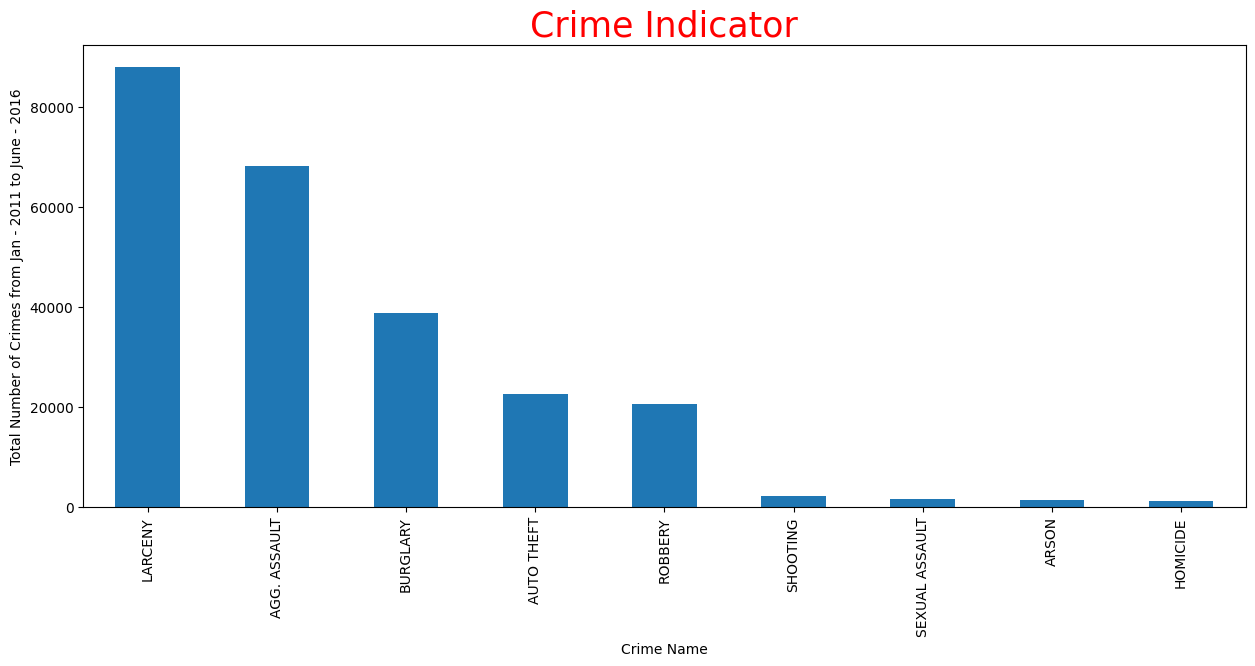

In [4]:
crime_indicator = df.groupby('CrimeCode').size().sort_values(ascending=False)

print(crime_indicator)

plt.subplots(figsize = (15, 6))
ax = crime_indicator.plot.bar()
ax.set_xlabel('Crime Name')
ax.set_ylabel('Total Number of Crimes from Jan - 2011 to June - 2016')
ax.set_title('Crime Indicator', color = 'red', fontsize=25)
plt.show()

Year
2011    50651
2012    49561
2013    49542
2014    45958
2015    48711
Name: count, dtype: int64


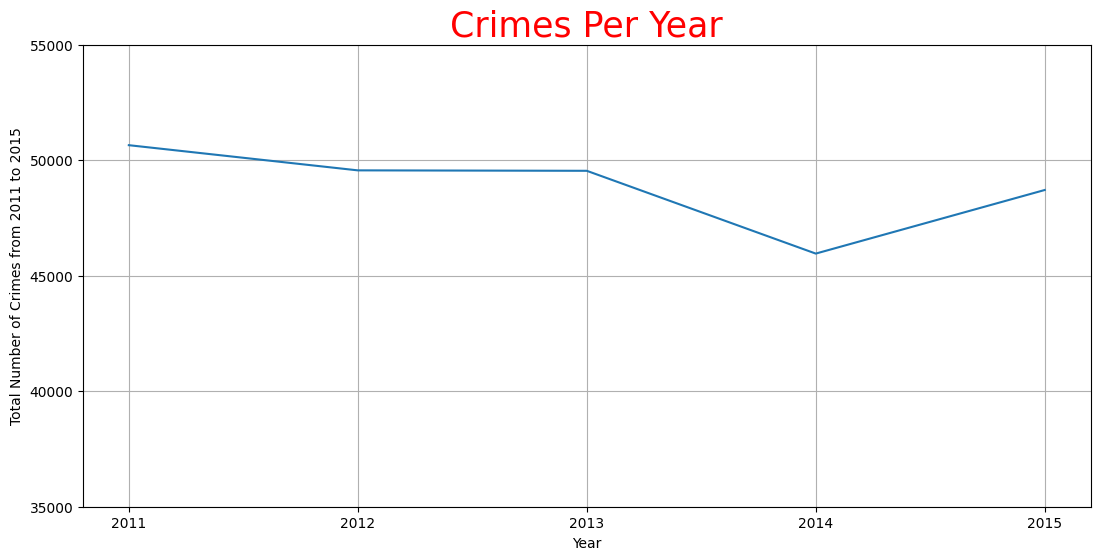

In [5]:
filtered_df = df[df['Year'] != 2016]

yearwise_total_crime = filtered_df['Year'].value_counts().sort_index()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ax = yearwise_total_crime.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Crimes from 2011 to 2015')
ax.set_title('Crimes Per Year', color='red', fontsize=25)
ax.grid(linestyle='-')

ax.set_xticks(yearwise_total_crime.index)

ax.set_ylim(bottom=35000)
y_ticks = range(35000, int(yearwise_total_crime.max()) + 5500, 5000)  # +5000 to ensure the last tick covers the max data point
ax.set_yticks(y_ticks)

plt.show()

District
NORTHEASTERN    39277
SOUTHEASTERN    33832
CENTRAL         28872
SOUTHERN        27927
NORTHERN        27496
NORTHWESTERN    24527
SOUTHWESTERN    22197
EASTERN         20507
WESTERN         19735
Name: count, dtype: int64


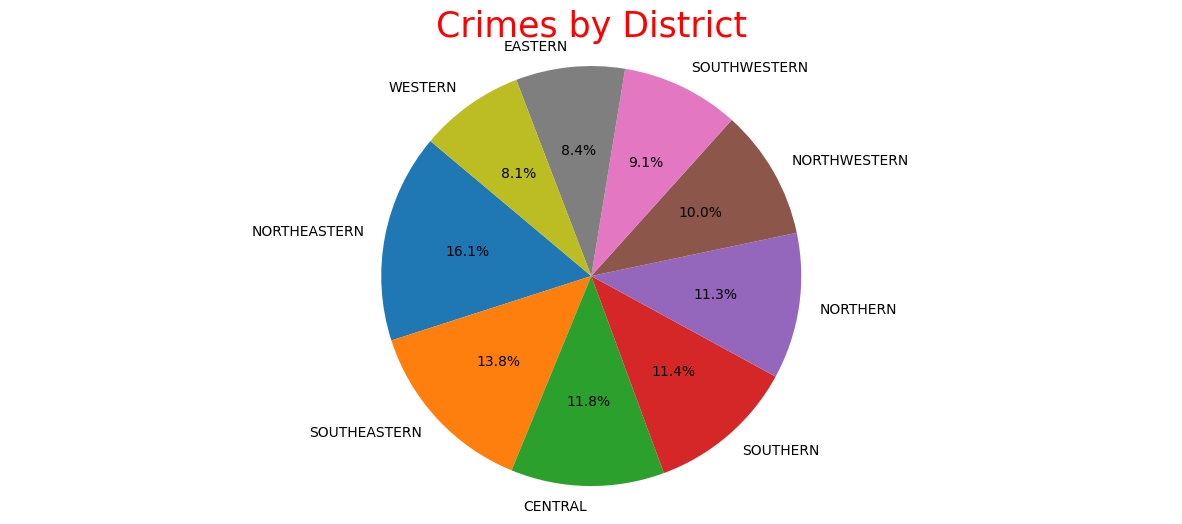

In [6]:
location = df['District']
diff_Locations = location.value_counts()
print(diff_Locations)

plt.figure(figsize=(15, 6))
plt.pie(diff_Locations, labels=diff_Locations.index, autopct='%1.1f%%', startangle=140)
plt.title('Crimes by District', color='red', fontsize=25)
plt.axis('equal')  
plt.show()

day_of_week
Friday       37042
Monday       35717
Wednesday    34841
Tuesday      34807
Saturday     34707
Thursday     34622
Sunday       32687
Name: count, dtype: int64


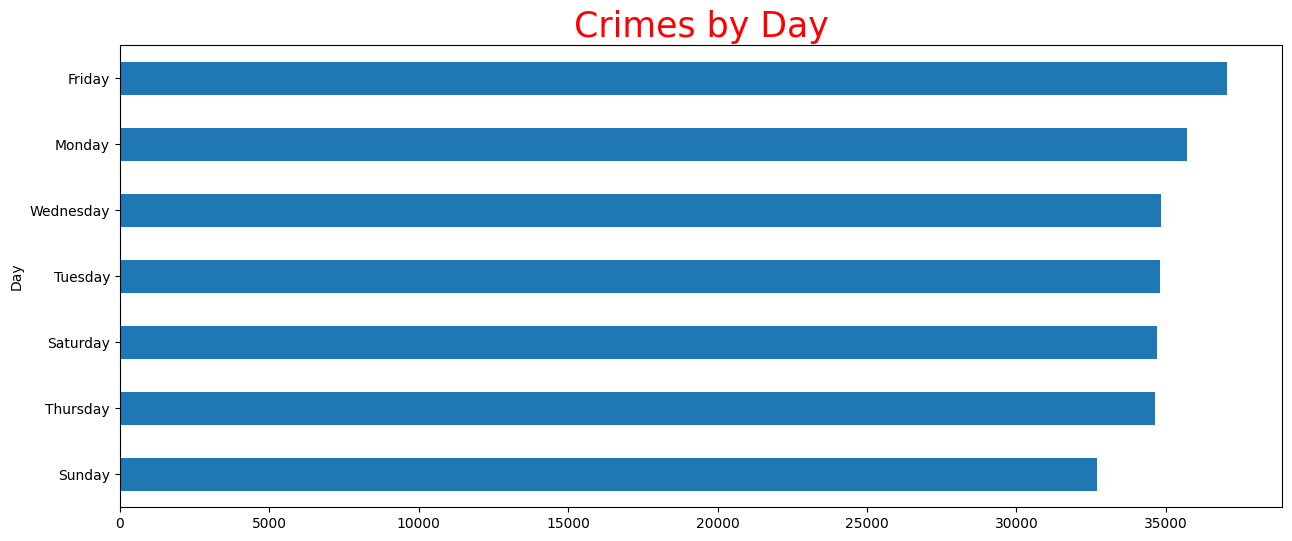

In [7]:
day = df['day_of_week']
diff_Days = day.value_counts()
print(diff_Days)

plt.subplots(figsize=(15, 6))
ct = diff_Days.sort_values(ascending=True)  
ax = ct.plot.barh()  
ax.set_ylabel('Day')
ax.set_title('Crimes by Day', color='red', fontsize=25)
plt.show()

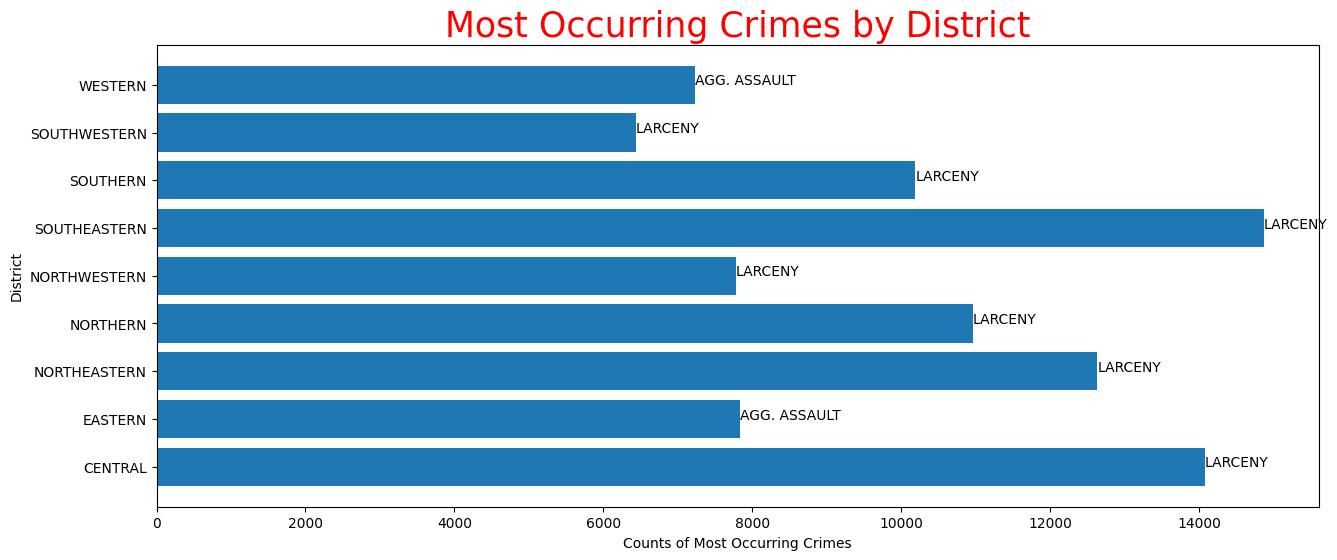

In [8]:
grouped = df.groupby(['District', 'CrimeCode']).size().reset_index(name='counts')

# Sort the results to get the most occurring crimes on top for each district
sorted_grouped = grouped.sort_values(['District', 'counts'], ascending=[True, False])

# Drop duplicate districts, keeping the crime with the highest count (the most occurring)
most_occurring_crimes = sorted_grouped.drop_duplicates('District', keep='first')

# Plot the results
plt.figure(figsize=(15, 6))
plt.barh(most_occurring_crimes['District'], most_occurring_crimes['counts'])
plt.xlabel('Counts of Most Occurring Crimes')
plt.ylabel('District')
plt.title('Most Occurring Crimes by District', color='red', fontsize=25)

# Add the crime codes as labels next to the bars
for index, value in enumerate(most_occurring_crimes['counts']):
    plt.text(value, index, str(most_occurring_crimes['CrimeCode'].iloc[index]))

plt.show()

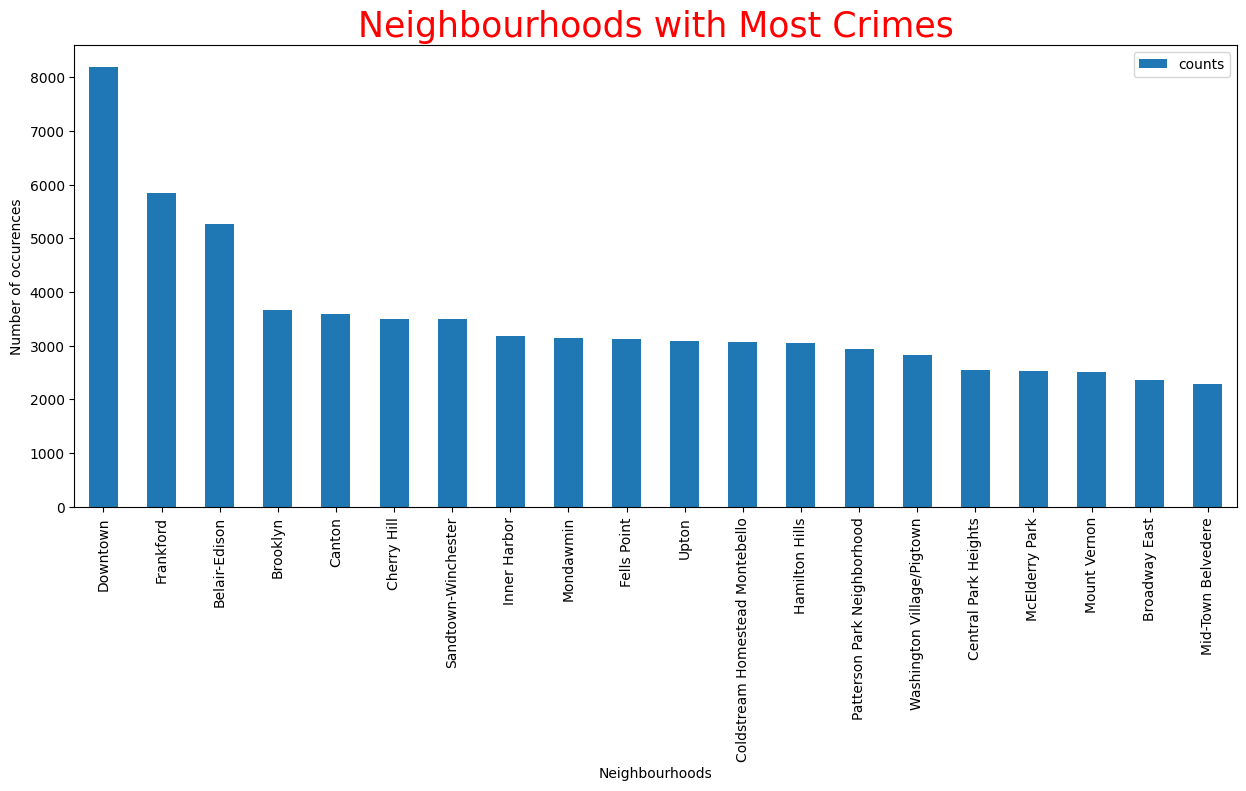

In [9]:
plt.clf()
plt.close()

location_group = df.groupby('Neighborhood').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(20)
# print(location_group)

location_group.plot(kind='bar', x='Neighborhood', y='counts', figsize=(15, 6))
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of occurences')
plt.title('Neighbourhoods with Most Crimes', color='red', fontsize=25)
plt.show()

Violent vs Property

Times of Crime

apply the counts and follow the Github Repo

In [11]:
# Group by 'CrimeCode' and 'Hour', then count the occurrences
crime_count_per_hour = df.groupby(['CrimeCode', 'Hour']).size().reset_index(name='TotalCrimes')

# Rename columns for clarity
crime_count_per_hour.rename(columns={'Hour': 'occurrencehour'}, inplace=True)

# Display the first few rows of the new DataFrame
crime_count_per_hour.head()

,CrimeCode,occurrencehour,TotalCrimes
0,AGG. ASSAULT,0,3785
1,AGG. ASSAULT,1,4047
2,AGG. ASSAULT,2,3210
3,AGG. ASSAULT,3,2069
4,AGG. ASSAULT,4,1316


In [12]:
# Group by 'CrimeCode' and 'Hour' and count the occurrences
crime_count = df.groupby(['CrimeCode', 'Hour']).size().reset_index(name='Total')

# Now, 'crime_count' is a DataFrame with each row representing a unique combination of 'CrimeCode' and 'Hour', 
# and the 'Total' column contains the count of crimes for each combination.

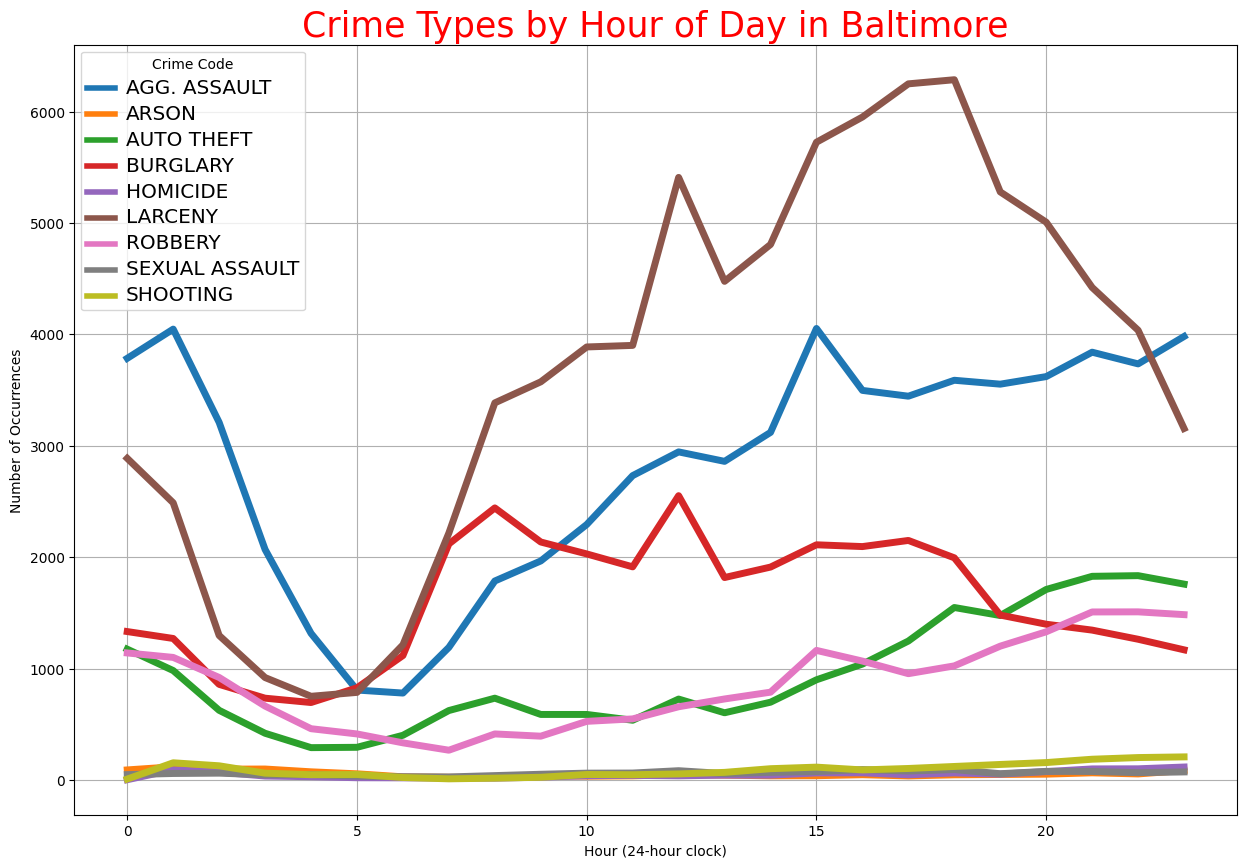

In [13]:
import matplotlib.pyplot as plt

# Assuming 'crime_count' is the DataFrame with 'CrimeCode', 'Hour', and 'Total' columns
# Rename 'Hour' to 'occurrencehour' for clarity
crime_count.rename(columns={'Hour': 'occurrencehour'}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))

# Group by 'CrimeCode' and plot
for crime_code, group in crime_count.groupby('CrimeCode'):
    group.plot(x='occurrencehour', y='Total', ax=ax, label=crime_code, linewidth=5)

ax.set_xlabel('Hour (24-hour clock)')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Crime Types by Hour of Day in Baltimore', color='red', fontsize=25)
ax.grid(linestyle='-')

# Adjusting the legend
leg = ax.legend(title='Crime Code')
plt.setp(leg.get_lines(), linewidth=4)
plt.setp(leg.get_texts(), fontsize='x-large')

plt.show()


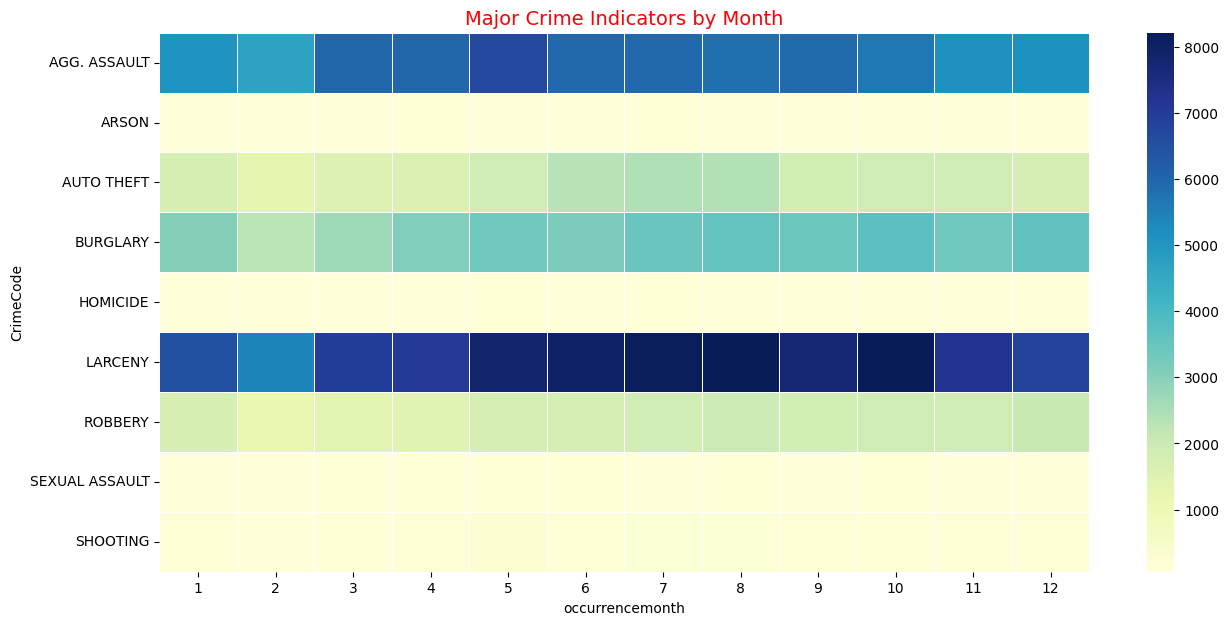

In [16]:
df['occurrencemonth'] = pd.to_datetime(df['Date']).dt.month

# Step 2: Aggregate data to get 'Total' count per month for each 'CrimeCode'
crimeCode_monthwise = df.groupby(['occurrencemonth', 'CrimeCode']).size().reset_index(name='Total')

# Step 3: Pivot the data for the heatmap
# Correct usage of pivot method
crime_count = crimeCode_monthwise.pivot(index='CrimeCode', columns='occurrencemonth', values='Total')

# Step 4: Create heatmap
plt.figure(figsize=(15, 7))
plt.yticks(rotation=1)
ax = sns.heatmap(crime_count, cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month", color='red', fontsize=14)
plt.show()